## Lab Work 3: Regularization

This notebook builds on the third lecture of Foundations of Machine Learning. We'll focus on regularization.

Important note: the steps shown here are not always the most efficient or the most "industry-approved." Their main purpose is pedagogical. So don't panic if something looks suboptimal—it's meant to be.

If you have questions (theoretical or practical), don't hesitate to bug your lecturer.

First the necessary imports:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### 1. Generate a synthetic dataset

For this lecture it is better to use a **synthetic dataset**. Don't worry, we will have fun with real data another time together!

- Create a dataset with informative, redundant, and noisy features.
- Create a dataset with informative, redundant, and noisy features.
- Define true coefficients for the informative features.
- Add Gaussian noise to the target.
- Split the data into training and test sets.


In [ ]:
def generate_synthetic_dataset(
    n_samples=200, n_informative_features=5, n_redundant=50, n_noise=100
):
    n_features = n_informative_features + n_redundant + n_noise

    true_coefs = np.zeros(n_features)
    true_coefs[:n_informative_features] = [10, 8, 6, 4, 2]

    X_informative = np.random.rand(n_samples, n_informative_features)

    X_redundant = np.zeros((n_samples, n_redundant))

    for i in range(n_redundant):
        X_redundant[:, i] = X_informative[
            :, i % n_informative_features
        ] + 0.1 * np.random.rand(n_samples)

    X_noise = np.random.rand(n_samples, n_noise)

    X = np.hstack((X_informative, X_redundant, X_noise))

    noise_std = 5.0

    # compute y, the thin i want to fit the model on
    y = X @ true_coefs + noise_std * np.random.rand(n_samples)

    # perfrom train split

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    return X_train, X_test, y_train, y_test

In [ ]:
n_samples = 200
n_informative_features = 5
n_redundant = 50
n_noise = 100
n_features = n_informative_features + n_redundant + n_noise

true_coefs = np.zeros(n_features)
true_coefs[:n_informative_features] = [10, 8, 6, 4, 2]

X_informative = np.random.rand(n_samples, n_informative_features)

X_redundant = np.zeros((n_samples, n_redundant))

for i in range(n_redundant):
    X_redundant[:, i] = X_informative[
        :, i % n_informative_features
    ] + 0.1 * np.random.rand(n_samples)

X_noise = np.random.rand(n_samples, n_noise)

X = np.hstack((X_informative, X_redundant, X_noise))

noise_std = 5.0

# compute y, the thin i want to fit the model on
y = X @ true_coefs + noise_std * np.random.rand(n_samples)

# perfrom train split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### 2. Standardize the features

- Use `StandardScaler` to scale the training and test features.
- Comment: why is scaling important for regularized linear models?


In [ ]:
scaler = StandardScaler()


# i use fit transform to adjsut the parameters of the scaler based on the training data
# and the i just want to transform the test data based on the same parameters
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### 3. Fit linear models

Fit the following models on the scaled training set:

- Ordinary Least Squares (OLS)
- Ridge Regression
- Lasso Regression -> why do I need max_iter?
- Elastic Net
- Predict on the test set.


In [ ]:
ols = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0, max_iter=10000)
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)

# fit the models
ols.fit(X_train_std, y_train)
ridge.fit(X_train_std, y_train)
lasso.fit(X_train_std, y_train)
elastic.fit(X_train_std, y_train)

# compute predictions on the test set
ols_y_pred_train = ols.predict(X_train_std)
ols_y_pred_test = ols.predict(X_test_std)

ridge_y_pred_train = ridge.predict(X_train_std)
ridge_y_pred_test = ridge.predict(X_test_std)

lasso_y_pred_train = lasso.predict(X_train_std)
lasso_y_pred_test = lasso.predict(X_test_std)

elastic_y_pred_train = elastic.predict(X_train_std)
elastic_y_pred_test = elastic.predict(X_test_std)

### 4. Compute performance metrics

- Compute RMSE and R² for each model on the test set.
- Compare the performance of OLS vs regularized models.

For true values $y_i$ and predicted values $\hat{y}_i$:

$$
R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}
$$

where $\bar{y}$ is the mean of the true values.


on top there is a mean square error,

if R = 1 we have a true model, because we can precisely predict every single point in the dataset

if R = 0, the model predict the mean, it just predicts barely the mean of the data

if R < 0, worse than the prediction of the mean, worse if i were to just use the mean


In [ ]:
def metrics(y_true, y_predict):
    rmse = np.sqrt(mean_squared_error(y_true, y_predict))
    r2 = r2_score(y_true, y_predict)
    return {"RMSE": rmse, "R2": r2}


print("OLS", metrics(y_test, ols_y_pred_test))
print("RIDGE", metrics(y_test, ridge_y_pred_test))
print("LASSO", metrics(y_test, lasso_y_pred_test))
print("ELASTIC", metrics(y_test, elastic_y_pred_test))

OLS {'RMSE': np.float64(4.598220543976772), 'R2': 0.05918930121865684}
RIDGE {'RMSE': np.float64(2.9530087353350227), 'R2': 0.6119817828001068}
LASSO {'RMSE': np.float64(2.641505046911063), 'R2': 0.6895257817872062}
ELASTIC {'RMSE': np.float64(2.0731504210048373), 'R2': 0.8087575578167429}


### 5. Multiple runs to show prediction instability

Add small Gaussian noise to the training set and refit each model multiple times. Plot predictions against true values to see which methods are stable.


OLS - R2: Mean=-0.0693, Std=0.3615
RIDGE - R2: Mean=0.6118, Std=0.0222
LASSO - R2: Mean=0.6858, Std=0.0026
ELASTIC - R2: Mean=0.8085, Std=0.0006


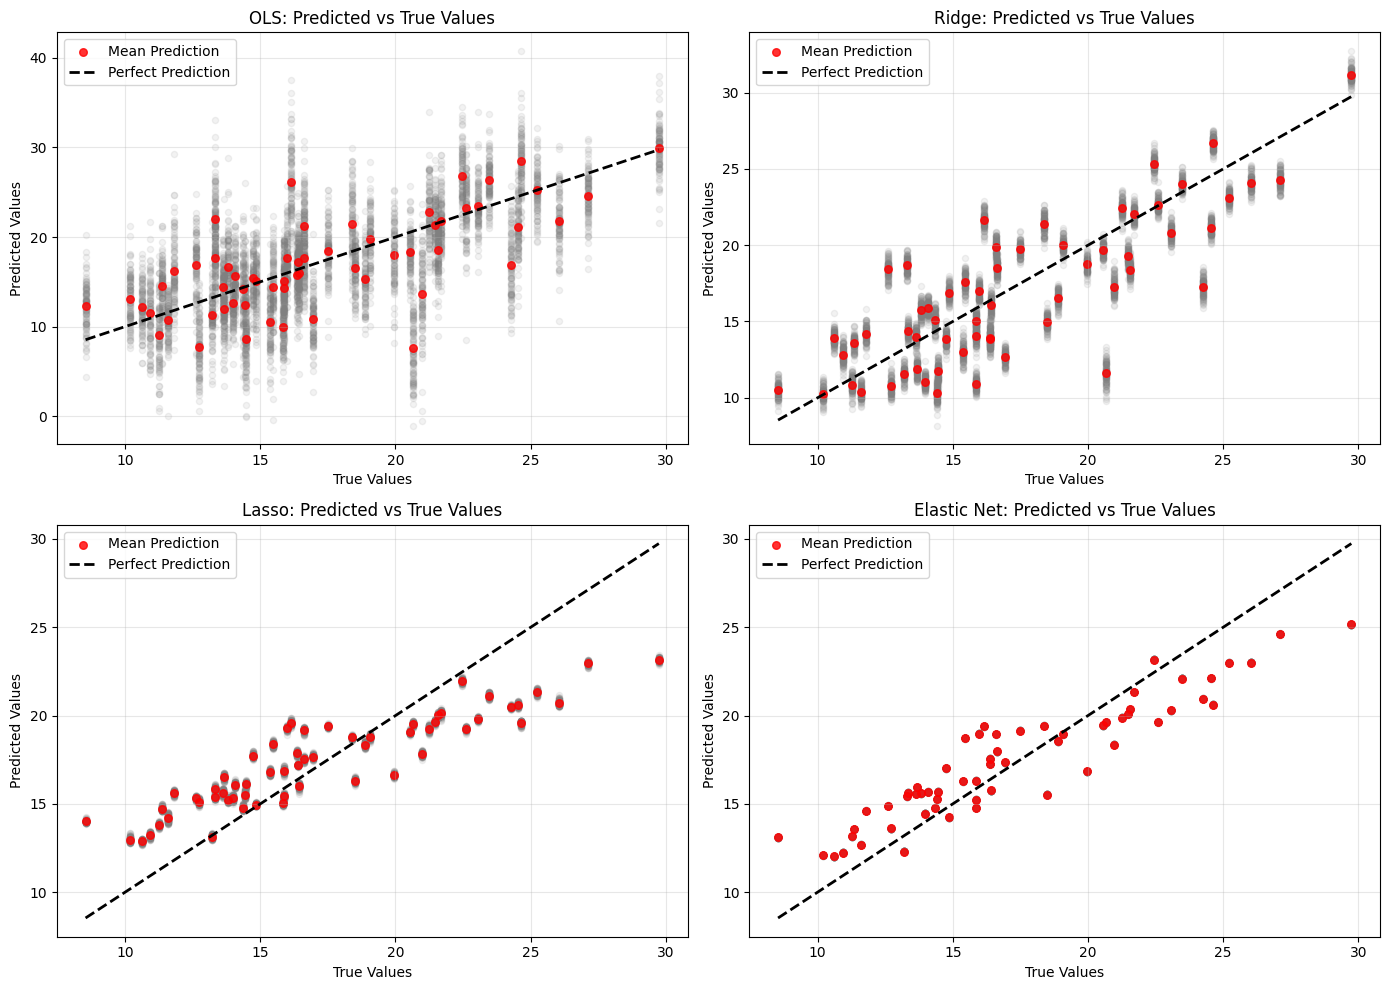

In [ ]:
n_runs = 100
preds_ols, preds_ridge, preds_lasso, preds_elastic = [], [], [], []

for run in range(n_runs):
    X_train_noisy = X_train_std + 0.05 * np.random.randn(*X_train_std.shape)

    ols.fit(X_train_noisy, y_train)
    ridge.fit(X_train_noisy, y_train)
    lasso.fit(X_train_noisy, y_train)
    elastic.fit(X_train_noisy, y_train)

    preds_ols.append(ols.predict(X_test_std))
    preds_ridge.append(ridge.predict(X_test_std))
    preds_lasso.append(lasso.predict(X_test_std))
    preds_elastic.append(elastic.predict(X_test_std))

preds_ols = np.array(preds_ols)
preds_ridge = np.array(preds_ridge)
preds_lasso = np.array(preds_lasso)
preds_elastic = np.array(preds_elastic)

for name, preds in zip(
    ["OLS", "RIDGE", "LASSO", "ELASTIC"],
    [preds_ols, preds_ridge, preds_lasso, preds_elastic],
):
    r2s = [r2_score(y_test, p) for p in preds]
    print(f"{name} - R2: Mean={np.mean(r2s):.4f}, Std={np.std(r2s):.4f}")


# plot predictions againt true value
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

models = [
    ("OLS", preds_ols),
    ("Ridge", preds_ridge),
    ("Lasso", preds_lasso),
    ("Elastic Net", preds_elastic),
]

for idx, (name, preds) in enumerate(models):
    ax = axes[idx]

    # Plot all predictions from multiple runs with low alpha
    for i in range(n_runs):
        ax.scatter(y_test, preds[i], alpha=0.1, s=20, color="gray")

    # Plot mean prediction
    mean_preds = np.mean(preds, axis=0)
    ax.scatter(
        y_test, mean_preds, alpha=0.8, s=30, color="red", label="Mean Prediction"
    )

    # Plot diagonal line
    ax.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        "k--",
        lw=2,
        label="Perfect Prediction",
    )

    ax.set_xlabel("True Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(f"{name}: Predicted vs True Values")
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### NOTE

regularization is something that keeps the model stble. You are not giving a lot of freedom to them so they result in being more stable.


### 6. Compare coefficients

Plot coefficients of all four models. Observe how Lasso and Elastic Net shrink some coefficients to zero while Ridge shrinks them continuously.


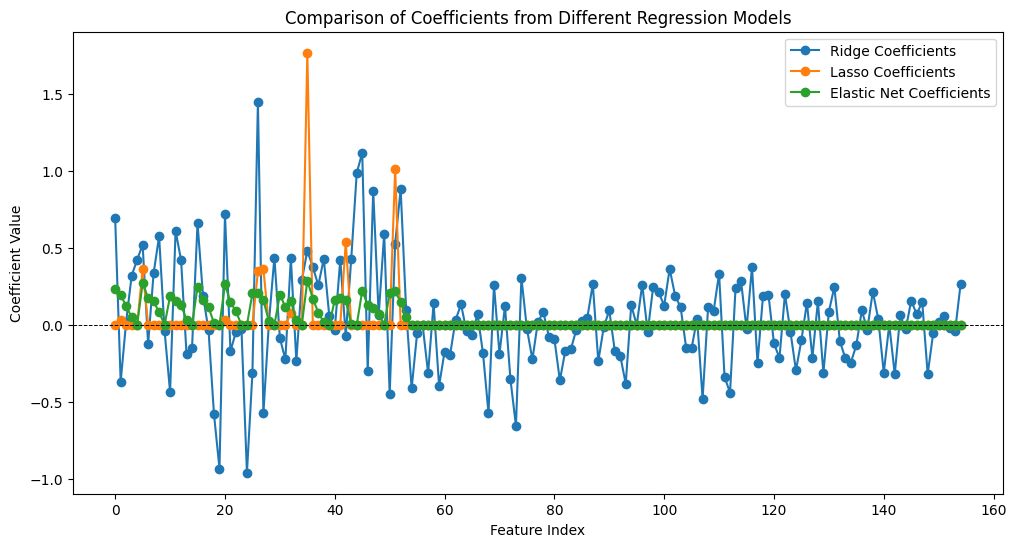

In [ ]:
coef_ols = ols.coef_
coef_ridge = ridge.coef_
coef_lasso = lasso.coef_
coef_elastic = elastic.coef_

plt.figure(figsize=(12, 6))
# plt.plot(coef_ols, label='OLS Coefficients', marker='o')
plt.plot(coef_ridge, label="Ridge Coefficients", marker="o")
plt.plot(coef_lasso, label="Lasso Coefficients", marker="o")
plt.plot(coef_elastic, label="Elastic Net Coefficients", marker="o")
plt.axhline(0, color="black", linestyle="--", linewidth=0.7)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Coefficients from Different Regression Models")
plt.legend()

### NOTE

OLS has much bigger magnitude
the features after 55 should be almost 0, because they are noisy

in lasso, coefficients are sparse, almost all are zero, lasso is forcing sparcity.
ridge is not forcing sparcity. even where there is noise, they are not zero.


OLS: 155/155 non-zero coefficients
Ridge: 155/155 non-zero coefficients
Lasso: 9/155 non-zero coefficients
Elastic Net: 43/155 non-zero coefficients


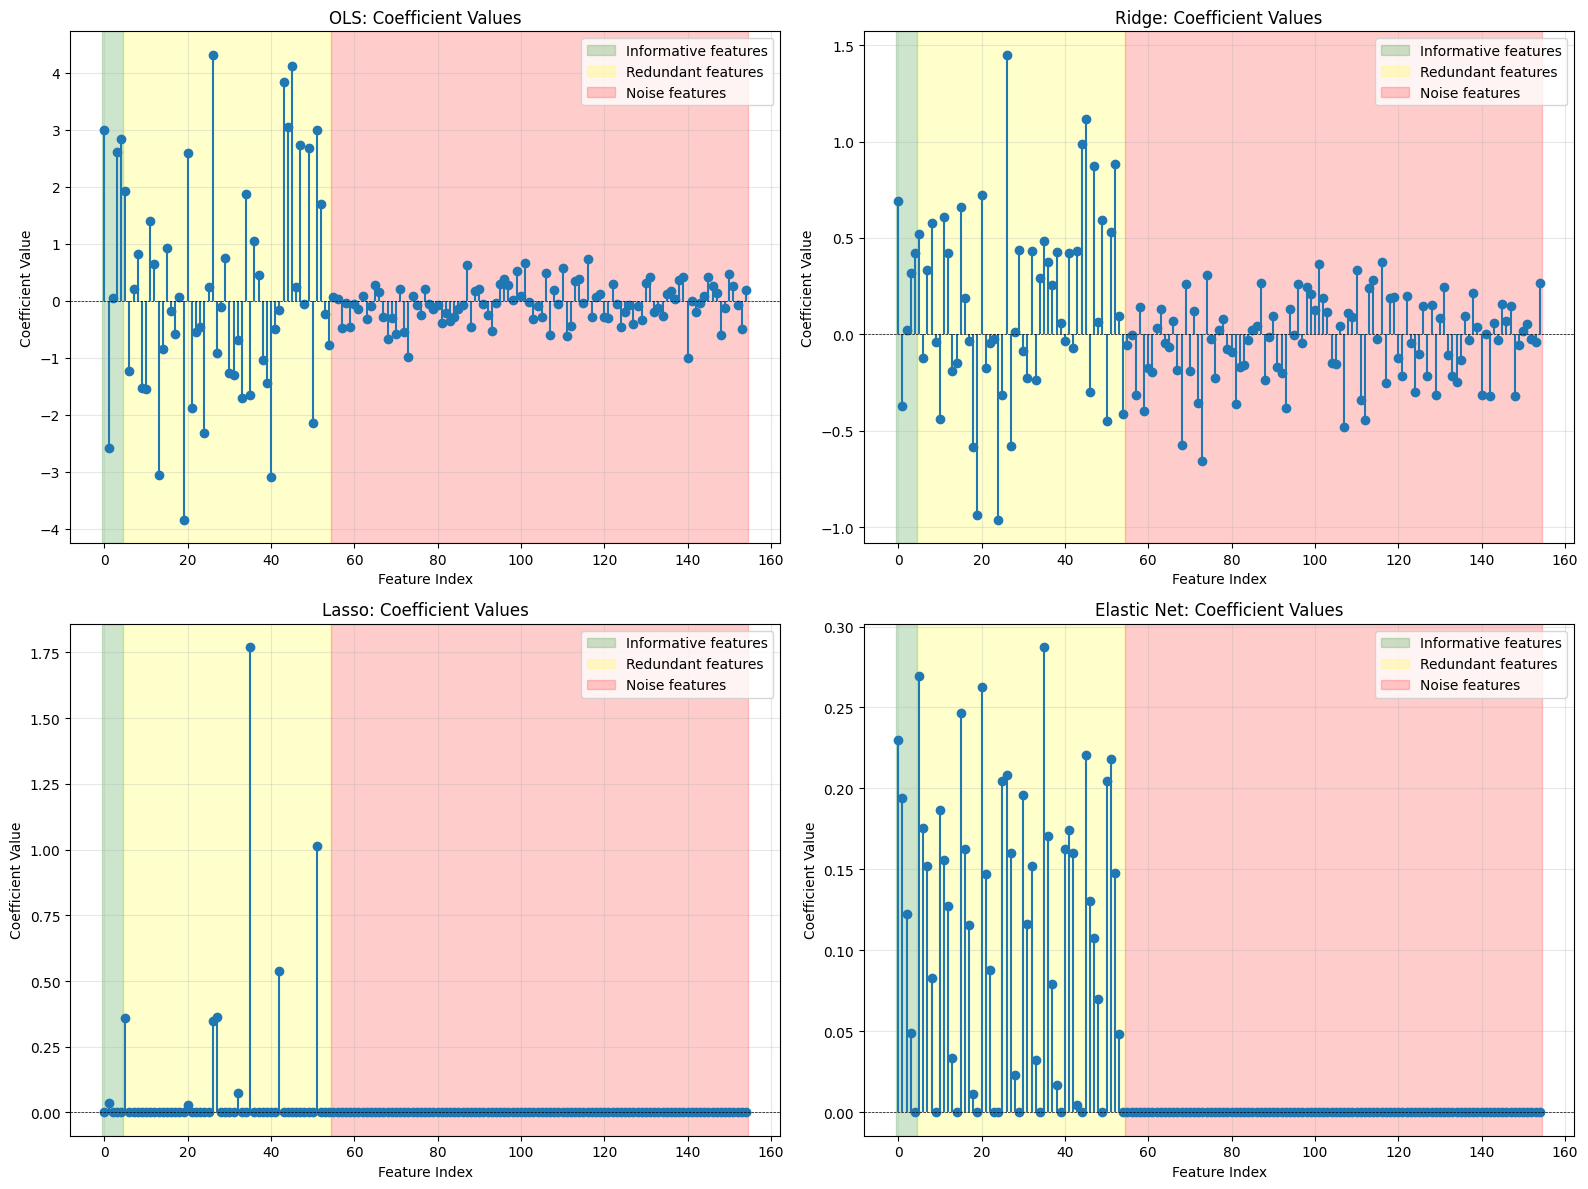

In [ ]:
# Extract coefficients from each model
coef_ols = ols.coef_
coef_ridge = ridge.coef_
coef_lasso = lasso.coef_
coef_elastic = elastic.coef_

# Plot coefficients
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

models_coefs = [
    ("OLS", coef_ols),
    ("Ridge", coef_ridge),
    ("Lasso", coef_lasso),
    ("Elastic Net", coef_elastic),
]

for idx, (name, coefs) in enumerate(models_coefs):
    ax = axes[idx]

    # Plot all coefficients
    ax.stem(range(len(coefs)), coefs, basefmt=" ")

    # Highlight the informative features (first 5)
    ax.axvspan(-0.5, 4.5, alpha=0.2, color="green", label="Informative features")

    # Highlight the redundant features (next 50)
    ax.axvspan(4.5, 54.5, alpha=0.2, color="yellow", label="Redundant features")

    # Highlight the noise features (last 100)
    ax.axvspan(54.5, len(coefs) - 0.5, alpha=0.2, color="red", label="Noise features")

    ax.axhline(y=0, color="k", linestyle="--", linewidth=0.5)
    ax.set_xlabel("Feature Index")
    ax.set_ylabel("Coefficient Value")
    ax.set_title(f"{name}: Coefficient Values")
    ax.legend()
    ax.grid(alpha=0.3)

    # Print number of non-zero coefficients
    non_zero = np.sum(np.abs(coefs) > 1e-5)
    print(f"{name}: {non_zero}/{len(coefs)} non-zero coefficients")

plt.tight_layout()
plt.show()

### 7. Coefficient paths

Vary the regularization strength (`alpha`) and plot the coefficient paths for Ridge, Lasso, and Elastic Net.


In [ ]:
alphas_ridge = np.logspace(-2, 2, 30)
alphas_lasso = np.logspace(-2, 2, 30)
alphas_enet = np.logspace(-2, 2, 30)

coef_ridge, coef_lasso, coef_enet = [], [], []

for a in alphas_ridge:
    coef_ridge.append(Ridge(alpha=a).fit(X_train_std, y_train).coef_)
for a in alphas_lasso:
    coef_lasso.append(Lasso(alpha=a, max_iter=10000).fit(X_train_std, y_train).coef_)
for a in alphas_enet:
    coef_enet.append(
        ElasticNet(alpha=a, l1_ratio=0.5, max_iter=10000)
        .fit(X_train_std, y_train)
        .coef_
    )

coef_ridge = np.array(coef_ridge)
coef_lasso = np.array(coef_lasso)
coef_enet = np.array(coef_enet)